# Probabilidad y estadística

In [182]:
## Importar paqueterías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

## Estadística descriptiva
---

### Medidas de posición
Son estadísticas descriptivas que nos indican dónde se encuentran ubicados los datos dentro de una distribución. Nos ayudan a entender el centro o la tendencia central de un conjunto de datos.

- **Media o Promedio**: Suma de todos los valores dividida entre el número total de valores.
- **Mediana**: Valor que divide al conjunto de datos en dos partes iguales.
- **ModaL**: Valor que más se repite en el conjunto de datos.
- **Cuartiles**: Dividen al conjunto de datos en cuatro partes iguales.
- **Percentiles**: Dividen al conjunto de datos en 100 partes iguales.


In [183]:
# Crear un DataFrame de ejemplo
data = {'Valor': [1, 2, 3, 4, 5, 5, 6, 7, 8, 10]}
df = pd.DataFrame(data)

# Calcular medidas de posición
media = df['Valor'].mean()
mediana = df['Valor'].median()
moda = df['Valor'].mode()
cuartiles = df['Valor'].quantile([0.25, 0.5, 0.75])

# Imprimir resultados
print('Media:', media)
print('Mediana:', mediana)
print('Moda:', moda)
print('Cuartiles:\n', cuartiles)

Media: 5.1
Mediana: 5.0
Moda: 0    5
Name: Valor, dtype: int64
Cuartiles:
 0.25    3.25
0.50    5.00
0.75    6.75
Name: Valor, dtype: float64


### Medidas de variabilidad
Las medidas de variabilidad nos permiten cuantificar el grado de dispersión o heterogeneidad de un conjunto de datos. Es decir, nos indican qué tan diferentes son los valores entre sí.

- **Rango**: Diferencia entre el valor máximo y el valor mínimo de un conjunto de datos.
- **Varianza**: Promedio de las desviaciones cuadráticas de cada dato respecto a la media.
- **Desviación** estándar: Raíz cuadrada de la varianza.
- **Coeficiente** de variación: Relación entre la desviación estándar y la media, expresada como porcentaje.
- **Cuartiles y rango intercuartílico**: El rango intercuartílico (IQR) es la diferencia entre el tercer y el primer cuartil.

La **varianza** se puede calcular mediamnte la función `var()`. 

In [184]:
## Calcular la varianza
x = [1, 2, 3, 4, 5, 6] # dataset

variance = np.var(x)
print(variance.round(2))

2.92


Para calcular la desviación estándar, que es la raíz cuadrada de la varianza, se puede utilizar el método `describe()` o bien con el método `std()` de la paquetería Numpy. 

In [185]:
# Obtener la varianza 
## Método describe()
s = pd.Series([1, 2, 3, 4, 5, 6])
print(s.describe().round(2))
print()

## Método std()
standard_deviation = np.std(x)
print(standard_deviation.round(2))

count    6.00
mean     3.50
std      1.87
min      1.00
25%      2.25
50%      3.50
75%      4.75
max      6.00
dtype: float64

1.71


Para calcular la **covarianza** es necesario calcular la matriz de covarianza utilizando el comando `cov()`. 

In [186]:
## Calcular la cobvarianza
x = [1, 2, 3, 4, 5, 6] # dataset 1
y = [41, 62, 89, 96, 108, 115] # dataset 2

## Calculamos la matriz de covarianza
covariance_matrix = np.cov(x,y)

## Extraemos la covarianza como valor
covariance = covariance_matrix[0][1] 
print(covariance)

51.5


## Probabilidad
---

## Espacio muestral
Se define como **espacio muestral** a el conjunto de todos estos resultados posibles, y se como ***S***. Es necesario tener en cuenta que **todos y cada uno** de los resultados deben incluirse en el espacio muestral. 

En Python, los cálculos de probabilidad simples basados en espacios muestrales se pueden realizar fácilmente usando el operador lógico `==` y la función `len()`.
    1. Con el `==` identifico el evento de mi interés
    2. Con `len()` determino el número de eventos de mi interés y el númeor total de eventos

In [187]:
## Creación de un df
cool_rock = pd.DataFrame(
    {
        'Artist': [
            'Queen',
            'Queen',
            'Queen',
            'Pink Floyd',
            'Nirvana',
            'AC/DC',
            'AC/DC',
            'Scorpions',
            'Scorpions',
            'Scorpions',
        ],
        'Song': [
            'The Show Must Go On',
            'Another One Bites The Dust',
            'We Will Rock You',
            'Wish You Were Here',
            'Smells Like Teen Spirit',
            'Highway To Hell',
            'Back in Black',
            'Wind Of Change',
            'Still Loving You',
            'Send Me An Angel',
        ],
    }
)
print(cool_rock)

       Artist                        Song
0       Queen         The Show Must Go On
1       Queen  Another One Bites The Dust
2       Queen            We Will Rock You
3  Pink Floyd          Wish You Were Here
4     Nirvana     Smells Like Teen Spirit
5       AC/DC             Highway To Hell
6       AC/DC               Back in Black
7   Scorpions              Wind Of Change
8   Scorpions            Still Loving You
9   Scorpions            Send Me An Angel


¿Cuál es la probabilidad de que si pulso aleatorio salga la canción "Smells Like Teen Spirit"

In [188]:
# Calcular la probabilidad
## Identificar los resultados que satisfacen el evento
interested_song = cool_rock[cool_rock["Song"]=="Smells Like Teen Spirit"]

## Determinar el número de resultados que satisfacen el evento
len_song_interested = len(interested_song)

## Contar el tamaño del espacio muestral.
total_song = len(cool_rock)

## Obtener la probabilidad
print("Por pasos:", len_song_interested/total_song)

## Obtener la probabilidad en un solo comando 
print("Directo:", len(cool_rock[cool_rock["Song"]=="Smells Like Teen Spirit"])/len(cool_rock))


Por pasos: 0.1
Directo: 0.1


### Factoriales 

En probabilidad y estadística muy a menudo nos encontramos con distintas maneras de organizar o reordenar un conjunto de elementos (**permutaciones**). A veces, es posible que el cálculo sea mental, en otras ocasiones no es tan sencillo.  

Ejemplo:    
Una escuela online ofreció a un estudiante tres cursos gratuitos: 
- ¿Cómo escribir un currículum eficaz?
- Ayuda profesional en orientación profesional.
- ¡Mejora tus habilidades para las entrevistas!   

Estos cursos pueden tomarse en cualquier orden. ¿Cuántos itinerarios educativos diferentes pueden crearse a partir de estos cursos?. Para ello utilizamos la fórmula

$Pn =n!$

Para calcular el número de permutaciones de *n* elementos se utiliza el factorial `!`. Para calcularlo en Python se puede utilizar la función `factorial()` del módulo `math`.

In [189]:
# Importar la función factorial del módulo matemático
from math import factorial

# Definir el número necesario de elementos
courses_amount = 3

# Calculae el factorial de 3 (el valor de la variable courses_amount)
result = factorial(courses_amount)

print(result)

6


### Combinaciones
Otra parte importante de la probabilidad y estadística son las **combinaciones**. Para calcular el número de combinaciones de *k* elementos de *n* opciones posibles:

In [190]:
# Definir los valores para las variables n y k
n = 10 # Número de elementos
k = 3  # Número de opciones posibles

# Realizar los cálculos
combinations = factorial(n) / (factorial(k) * factorial(n-k))
print(combinations)

120.0


Si observamos, la fórmula de permutación es similar a la fórmula e combinaciones, donde se le agregan los términos relacionados con el número de combinaciones de *k*.

**Ejercicio 1**    
Estás desarrollando con tus amigos un juego de búsqueda que consta de 10 tareas diferentes. Las tareas pueden realizarse en cualquier orden, pero solo una secuencia de todas las existentes permite a los jugadores ganar el superpremio. ¿Cuál es la probabilidad de ganar el superpremio, suponiendo que la probabilidad de elegir cada tarea en cualquier fase de la búsqueda es la misma?

**Resultado 1**   
Son 10 tareas distintas, y aunque dice que puede ser cualquier orden solo 1 secuencia es la ganadora. Por lo tanto la probabilidad sería 1 serie entre el número de eventos posible en orden dado. 

In [191]:
# Definir los valores para las variables n y k
## Solo hay elementos y no hay combinaciones específicas, k=0
tasks = 10 # Elementos o n

## Calculo de las permutaciones o combinaciones posibles
permutations = factorial(tasks)
print(permutations)
print() 

## Probabilidad: solo una secuencia permite ganar el superpremio
probability = 1 / permutations

print(probability)

3628800

2.755731922398589e-07


Existen 10 tareas diferentes, por lo tanto, existen 3,628,800 combinaciones diferentes. La probabilidad de ganar el superpremio con la secuencia de tareas ordenadas de manera correcta es inferior al 0.00003%. 

**Ejercicio 2**   
Ahora, los jugadores pueden elegir las tres tareas con las que quieren empezar el juego. El orden de las tareas no importa, lo importante es la combinación. Si los jugadores consiguen adivinar la "combinación secreta", recibirán un código promocional de descuento. Por lo tanto  

**Resultado 2**
Son las mismas 10 tareas, solo que ahora tenemos una combinación de 3 tareas y las combinaciones no tienen un orden específico.

In [192]:
# Definir los valores para las variables n y k
## Existen 10 tareas y se pueden seleccionar 3 tareas con las que empezar
tasks = 10 # Elementos o n
chosen = 3 # Opciones a seleccionar o k

## Calculo de las permutaciones o combinaciones posibles
permutations = factorial(tasks)/(factorial(chosen)*factorial(tasks-chosen))
print(permutations)
print()

## Probabilidad: solo una secuencia permite ganar el superpremio
probability = 1 / permutations

print(probability)

120.0

0.008333333333333333


En esta ocasión, de las 10 tareas existentes y al seleccionar las tres posibles tareas con las cuales empezar, se tienen 120 opciones disponibles. Esto hace que la probabilidad de obtener un código promocional es de casi el 1% 

## Distribuciones
---
La mayoría de las variables aleatorias se modelan en una forma que puede ser descrita por parámetros. Esto es lo que normalmente llamamos **distribuciones de datos**.

Las distribuciones de datos son una de las piedras angulares de las estadísticas. Las pruebas de hipótesis y la teoría de la probabilidad surgieron del simple concepto de trazar las múltiples ocurrencias de una variable aleatoria, visualizar su forma y realizar algún cálculo con ella. Las distribuciones nos ayudan a entender:

- ¿Cuál es el promedio/valor esperado de una variable aleatoria?
- ¿Cuál es la varianza/dispersión de una variable aleatoria?
- ¿Cuál es el rango de valores?

Existen dos tipos de distribuciones **discretas** (toman un cierto número de valores) y **contínuas** (toman un número infinitesimal de valores). 

En Python, es posible crear datasets con varios tipos de distribución, utilizando la librería NumPy, capaz de generar números aleatorios con una distribución específica.

El objeto principal es un `ndarray` (array N-dimensional), que es un array multidimensional que contiene elementos del mismo tipo y no puede modificarse durante la ejecución del código.Para crear ndarray utilizamos la función `np.array()`. 

In [193]:
## Creación de un ndarray
data = np.array([1, 3, 5, 7, 11, 13, 17, 19, 23, 317])

### Distribución normal
Es la distribución de probabilidad más común, forma parte de las distribuciones contínuas. Describe la probabilidad de que una variable aleatoria tome un valor determinado alrededor de una media, con una desviación estándar determinada.

Para crear una distribución normal es necesario llamar la función `normal()` del método `random`. 

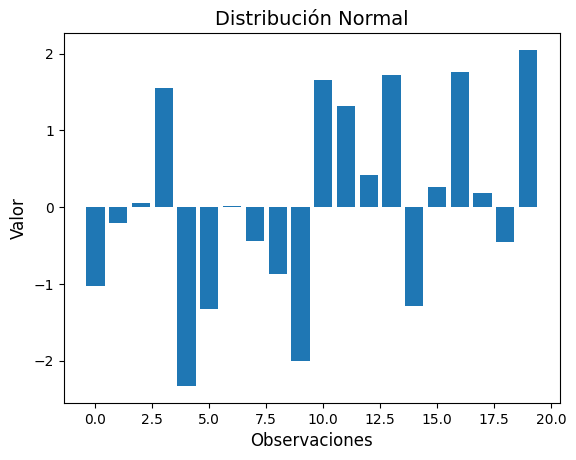

In [194]:
## Generar 20 valores aleatorios
data = np.random.normal(size=20)


# Graficar los datos
plt.bar(range(len(data)), data)
plt.xlabel('Observaciones', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.title('Distribución Normal', fontsize=14)

# Mostrar la gráfica
plt.show()

Esta distribución está definida por dos parámetros clave: la **media** (μ) y la **varianza** (σ²). Describe la probabilidad de que una variable aleatoria tome un valor cercano a la media, con una desviación estándar específica (σ).

Es posible generar arrays con media y desviación estándar dadas, para ello tenemos que especificarlos dentro de la función con los parámetros `loc` y `scale`, respectivamente. 

[16.37025049 18.18571069 12.23055211 13.86127238  9.18277362 14.80733504
 12.25677229  9.78597226 18.35341775 17.3634952   4.94501468 15.60285787
  6.9860645  13.75694278  8.58581233 10.43237719 14.6640753  16.67195316
 19.03646785 14.51890773]


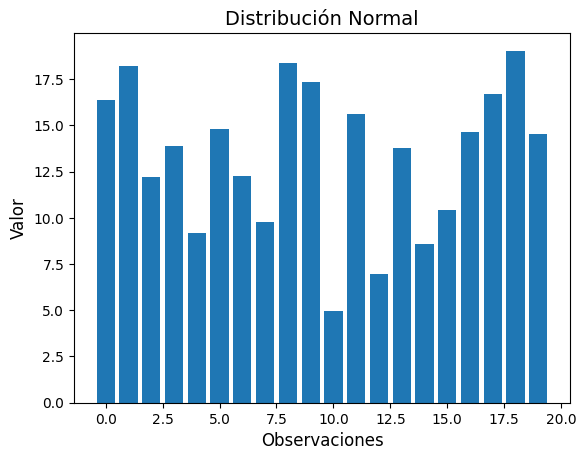

In [195]:
## Generar 20 valores con promedio de 15 y desviación estándar de 5
mean = 15  # media entre 1 y 30
std_dev = 5  # desviación estándar aleatoria

data = np.random.normal(loc= mean, scale= std_dev, size = 20)
print(data)

# Graficar los datos
plt.bar(range(len(data)), data)
plt.xlabel('Observaciones', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.title('Distribución Normal', fontsize=14)

# Mostrar la gráfica
plt.show()

En Python, es posible realizar cálculos con datos que siguen una distribución normal utilizando la librería **SciPy** y su módulo **stats**.

Para generar una distribución normal con parámetros específicos como la media y la desviación estándar, se emplea la función `stats.norm()`.

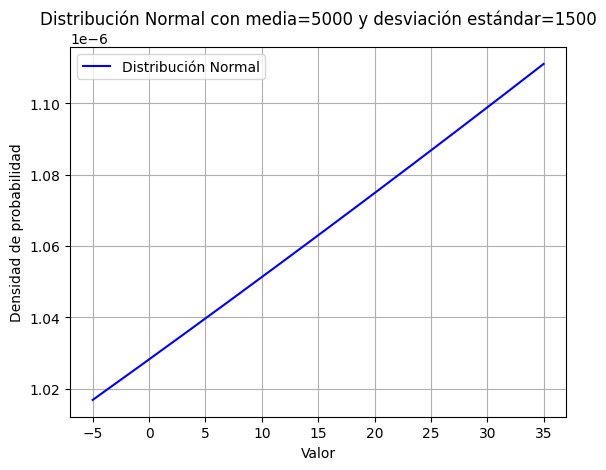

In [196]:
# Datos distribuidos normalmente con una media de 5 000 y una desviación estándar de 1500.
## Crear un rango de valores
n = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

## Distribución normal
data = st.norm(5000, 1500)

# Calcular la función de densidad de probabilidad (PDF)
pdf = data.pdf(n)

# Calcular la función de densidad de probabilidad (PDF)
pdf = data.pdf(n)

# Graficar la PDF (esto dará la forma de la campana de Gauss)
plt.plot(n, pdf, label='Distribución Normal', color='blue')
plt.title('Distribución Normal con media=5000 y desviación estándar=1500')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.legend()
plt.show()


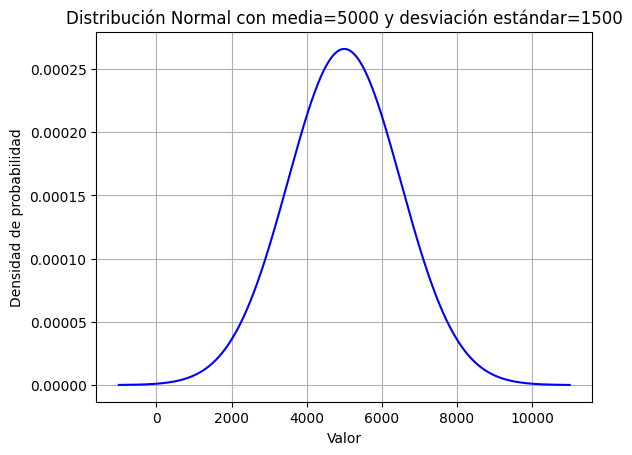

In [197]:
# Parámetros de la distribución normal
mean = 5000
std_dev = 1500

# Crear un rango de valores centrado alrededor de la media, extendido para ver la curva
n = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Distribución normal con media 5000 y desviación estándar 1500
data = st.norm(mean, std_dev)

# Calcular la función de densidad de probabilidad (PDF)
pdf = data.pdf(n)

# Graficar la PDF (esto dará la forma de la campana de Gauss)
plt.plot(n, pdf, label='Distribución Normal', color='blue')
plt.title('Distribución Normal con media=5000 y desviación estándar=1500')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.show()


Los métodos más comunes para trabajar con esta distribución incluyen:

- `norm.cdf()`: Calcula la probabilidad de que la variable aleatoria sea menor o igual a un valor dado. Responde a la pregunta: "¿Cuál es la probabilidad de que ocurra un valor menor o igual que x?"

- `norm.ppf()`: Devuelve el valor de la variable aleatoria asociado a una determinada probabilidad. Responde a la pregunta: "¿Qué valor de x corresponde a una probabilidad acumulada dada?"

**Ejercicio 1**  
El número de visitantes mensuales de una tienda virtual tiene una distribución normal con una media de 100 500 y una desviación estándar de 3 500.

Encuentra la probabilidad de que en el próximo mes el sitio web del outlet tenga:

- menos de 92 000 visitantes;
- más de 111 000 visitantes.

In [198]:
## Asignar variables
mu = 100500
sigma= 3500

fewer_threshold=92000
upper_threshold= 111000

## Calculas la probabilidad baja
p_fewer_visitors = st.norm(mu, sigma).cdf(fewer_threshold)

print(round(float(p_fewer_visitors),4)*100)

## Calcula la probabilidad arriba
p_upper_visitors = 1-st.norm(mu, sigma).cdf(upper_threshold)

print(round(float(p_upper_visitors),4)*100)

0.76
0.13


La probabilidad de tener menos de 92,000 visitantes es aproximadamente 0.76%, lo que indica que es bastante improbable que el número de visitantes sea tan bajo.

La probabilidad de tener **más de** 111,000 visitantes es alrededor de 0.13%, lo que sugiere que es muy poco probable que el número de visitantes exceda este valor en el próximo mes.

> [Nota]   
> El CDF devuelve la probabilidad acumulada de que el valor de la variable aleatoria sea **menor o igual** a cierto umbral. Si estás buscando la probabilidad de que el valor **sea mayor** a un cierto umbral, es necesario usar el complemento de la CDF. Como la probabilidad total es 1, el complemento $(1 - CDF)$ 

**Ejercicio 2**  
Fancy Pants vende productos de regalo a un público muy limitado de clientes corporativos. Las ventas semanales en la tienda de conjuntos de ajedrez de lujo fabricados con colmillo de mamut tienen una distribución normal con una media de 420 y una desviación estándar de 65.

El equipo de inventario está decidiendo cuántos conjuntos pedir. Quieren que la posibilidad de venderlos todos la próxima semana sea del 90%. ¿Cuántos deben pedir?

**Respuesta 2**  
Nos da datos como la media y la desviación estandar. Además, nos pregunta la cantidad de productos que se tienen que pedir para vender aprox. el 90%. Por lo tanto:  

In [199]:
## Asignar valores dados
mu = 420
sigma = 65
prob= 0.9

## Calcular el valor de la variable aleatoria
n_shipment= st.norm(mu,sigma).ppf(1-prob)

print(round(float(n_shipment), 2))

336.7


Se tienen que pedir 336 artículos para no tener demasiado inventario y maximizar ingresos. 

-----


**Ejercicio 1**   
Tenemos que contar a los estudiantes que obtuvieron resultados: excelente (90 puntos o más), notable (70-89 puntos), satisfactorio (50-69), aprobado (20-49) y que reprobaron (20 o menos). 

**Resultado 1**   
Crea un diccionario summarized_data y escribe código para rellenarlo con los datos necesarios.

In [200]:
## Datos
exam_results = np.array(
    [
        42,  56,  59,  76,  43,  34,  62,  51,  50,  65,  
        66,  50,  46,  5,  79, 99,  51,  26,  35,   8,  
        34,  47,  64,  58,  61,  12,  30,  63,  20,  68
    ]
)

## Diccionario con valores iniciales
summarized_data = {'excellent': 0, 
                   'good': 0, 
                   'average': 0, 
                   'passable': 0,  
                   'failed': 0
                  }

## Bucle para sumar a la lista  
for grade in exam_results: 
    if grade >= 90:
        summarized_data["excellent"] +=1
    elif grade >= 70:
        summarized_data["good"] +=1
    elif grade >= 50:
        summarized_data["average"] +=1
    elif grade >= 20:
        summarized_data["passable"] +=1
    else: 
        summarized_data["failed"] +=1
        

## Código para mostrar los resultados en pantalla.
for result in summarized_data:
    print(result, '-', summarized_data[result])

excellent - 1
good - 2
average - 14
passable - 10
failed - 3


### Binomial 
Describe la probabilidad discreta que describe el número de éxitos en una **secuencia de ensayos** independientes con dos resultados posibles, generalmente denominados ***éxito y fracaso***.

Si la probabilidad de éxito es *𝑝*, la probabilidad de fracaso es $1−p$, ya que la suma de las probabilidades siempre es 1, es decir, 100%.

Si solo se realiza un solo experimento, estamos ante una distribución sencilla o **experimento de Bernoulli**. La probabilidad en este tipo de distribuciones se determina multiplicando la probabilidaddes individuales de cada resultado. 

**Ejemplo 1**  
Queremos calcular la probabilidad de la combinación de éxito-éxito-fracaso-fracaso-éxito (**en ese orden**),

**Resultado 1**   
Entendemos que éxito es p y fracaso es $1-p$. Por lo tanto: 

$p * p * (1-p) * (1-p) * p$ 

**Ejemplo 2**    
Supongamos que en el 88% de las casos los usuarios hacen su primer clic en un banner publicitario, y en el 12% de los casos hacen clic en otro sitio y acaban en una página diferente. ¿Cuál es la probabilidad de que, de dos usuarios diferentes, uno haga clic en el banner y el otro no?   

**Resultado 2**  
Primer usuario, tiene la probabilidad de 88% y un 12% de no hacerlo, por lo tanto: 

$P=0.88*0.12=0.1056$

si eso lo aplicamos al segundo usuario, entonces: 

$P=(0.88*0.12=0.1056)·2 = 0.2112 = 21.12\%$

Cuando realizamos **más de un experimento**, utilizamos la distribución binomial para calcular la probabilidad de obtener un número específico de éxitos en n pruebas. En este caso, debemos considerar todas las posibles formas en las que se pueden distribuir k éxitos entre n ensayos.

Para calcular esta probabilidad, usamos la fórmula:

$P= C k,n  ·  p^k ·  q^(n-k)$

donde: 

- $C k,n$ es el número de combinaciones posibles de k éxitos en n ensayos.
- $p^k$ es la probabilidad de obtener k éxitos.
- $q^(n-k)$ es la probabilidad de obtener $n - k$ fracasos

**Ejercicio 1**  
Los portátiles de Pineapple son caros, pero siguen siendo populares entre los geeks de la informática: el 60% de los clientes están dispuestos a comprarse una computadora portátil de esta marca si acuden a la tienda. Los portátiles de Banana son más baratos, pero no tan populares: solo el 20% de los visitantes de la tienda están dispuestos a comprarlos.

Supongamos que la tienda solo tiene a la venta equipos de Pineapple. ¿Cuál es la probabilidad de que 50 de cada 80 clientes realicen una compra en un día?

In [201]:
p = 0.6 # la probabilidad de que un cliente realice una compra
q = 0.4 # la probabilidad de que un cliente NO realice una compra
n = 80  # el número total de visitantes
k = 50  # el número de visitantes que esperamos que realicen una compra

probability = factorial(n) / (factorial(k) * factorial(n-k)) * (p ** k) * (q ** (n-k))

print(probability)

0.0826713508623046


La probabilidad de que exactamente 50 personas compren computadoras portátiles es ligeramente superior al 8%. Un  buen resultado para un producto caro. 

**Ejercicio 2**    
Supongamos que, al lado de una tienda de hardware Pineapple, hay un gran centro comercial con otra tienda que vende computadoras Banana. 160 clientes visitan esa tienda durante el día. ¿Cuál es la probabilidad de que 50 de esos visitantes se compren una computadora portátil?

Recuerda que solo el 20% de los usuarios están dispuestos a comprar un portátil de la marca Banana.

In [202]:
p = 0.2 # la probabilidad de que un cliente realice una compra
q = 0.8 # la probabilidad de que un cliente NO realice una compra
n = 160# el número total de visitantes
k = 50 # el número de visitantes que esperamos que realicen una compra

probability = factorial(n) / (factorial(k) * factorial(n - k)) * (p**k) * (q**(n-k)) 

print(probability)

0.00024035993375900262


La probabilidad de que compren este portatil es más de 300 veces menor que el ejemplo pasado. 

In [203]:
## Probabilidades
probs= np.array([0.75, 0.25])

## Opciones


### Distribución uniforme
Discreta

Continua

### Distribución binomial
Es el experimento de Bernoiulli pero realizado con repeticiones


### Distibución normal (Gaussiana)

En Python es posible generar distribuciones normales con parámetros dados utilizando la función `stats.norm()`, con la librería SciPy. También estudiaremos los métodos `norm.cdf` y `norm.ppf`, que permiten: 

| Nombre| Sintaxis| Explicación	| Ejemplo|
| ---   | ---    | --- | --- |
|La función de distribución acumulativa| `norm.cdf()`	|Da la probabilidad de que una variable aleatoria sea menor o igual que un valor determinado |	¿Cuál es la probabilidad de que un estudiante pueda aprender una nueva profesión por menos de 4 000 dólares?|
|La función de punto porcentual| 	`norm.ppf()` | Da el valor de la variable aleatoria que corresponde a una determinada probabilidad|	¿Cuál es el coste máximo de la formación para el 10% de los estudiantes que gastaron menos dinero en sus estudios?| 

In [204]:
## Importar el módulo stats.
from scipy import stats as st

#® Crear una distribuidos normal con una media de 5 000 y una desviación estándar de 1500.
data = st.norm(5000, 1500)

# Pregunta 1
## Crear una variable para almacenar el coste deseado.
desired_cost = 4000

## Calcular la probabilidad de obtener el valor desired_cost.
probability = data.cdf(desired_cost)

print(probability)

# Pregunta 2
## Establecemos el valor de la probabilidad. Buscaremos el umbral del coste de los estudios 
# para el 10% de los estudiantes que gastaron menos dinero.
target_level = 0.1

## Encontramos el importe que no supere los gastos del 10% de estudiantes que gastaron menos dinero.
cost = data.ppf(target_level)

print(cost)

0.2524925375469229
3077.6726516830995


Ejercicio
La puntuación media en el examen del Certificado de análisis de datos es 1000 y la desviación estándar es 100. Hay que encontrar la probabilidad de obtener entre 900 y 1 100 puntos en el examen.

¿Qué código se debe utilizar para ello?
**R**: `st.norm(1000, 100).cdf(1100) - st.norm(1000, 100).cdf(900)`

> El `cdf`siempre ira acompañado a la pregunta ¿cuá es la probabilidad?

Encuentra la probabilidad de que en el próximo mes el sitio web del outlet tenga:

menos de 92 000 visitantes;
más de 111 000 visitantes.

In [205]:
from scipy import stats as st

mu = 100500
sigma = 3500

more_threshold = 111000
fewer_threshold = 92000

p_more_visitors = 1 - st.norm(mu, sigma).cdf(more_threshold)
p_fewer_visitors = st.norm(mu, sigma).cdf(fewer_threshold)

print(f'Probabilidad de que el número de visitantes sea superior a {more_threshold}: {p_more_visitors}')
print(f'Probabilidad de que el número de visitantes sea inferior a {fewer_threshold}: {p_fewer_visitors}')

Probabilidad de que el número de visitantes sea superior a 111000: 0.0013498980316301035
Probabilidad de que el número de visitantes sea inferior a 92000: 0.0075792194387197245


> Si me dan la probabilidad entonces va de la mano del `ppf()`

Fancy Pants, vende productos de regalo a un público muy limitado de clientes corporativos. Las ventas semanales en la tienda de conjuntos de ajedrez de lujo fabricados con colmillo de mamut tienen una distribución normal con una media de 420 y una desviación estándar de 65.

El equipo de inventario está decidiendo cuántos conjuntos pedir. Quieren que la posibilidad de venderlos todos la próxima semana sea del 90%. ¿Cuántos deben pedir?

In [206]:
from scipy import stats as st

mu = 420
sigma = 65
prob = 0.9

n_shipment = st.norm(mu, sigma).ppf(1 - prob)

print('Cantidad de artículos a pedir:', int(n_shipment))

Cantidad de artículos a pedir: 336


### Combinación de las distribuciones binomiales y normales


### Distribución de Poisson


## Test estadísticos

Los **tests de hipótesis** son métodos estadísticos utilizados para evaluar si una afirmación sobre un conjunto de datos es razonable o no. A través del análisis de los datos, se determina si hay suficiente evidencia para rechazar la hipótesis nula en favor de la alternativa, usando medidas como el valor p y un nivel de significancia predefinido (α).

### Usos 
- **Investigación clínica**
- **Pruebas A/B**
- **Selección de características en ML**

### Pasos 
1. **Definir la hipótesis nula y alternativa**. Se comienza con una hipótesis nula (H₀), que representa una afirmación de "no efecto" o "no diferencia", y una hipótesis alternativa (H₁), que sugiere lo contrario. 
2. **Elegir la prueba estadística adecuada**
3. **Calcular el valor de (*p value*)**
4. **Determinar la significancia estadística**

### Pruebas estadísticas
Existen diferentes tipos comunes de prueba estadísticas, entre ellas: 

- **T de student**
- **Z test**
- **Análisis de varianza (ANOVA)**
- **Chi cuadrada**
- 